In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('abuja_listings.csv')

# Display the first few rows of the dataset
print(df.head())


   id  added_on_year              type  bedrooms bathrooms toilets  \
0   1           2025  Flat / Apartment         3         4       4   
1   2           2025   Detached Duplex         6         6       7   
2   3           2025   Detached Duplex         5         5       6   
3   4           2025   Detached Duplex         5         5       6   
4   5           2025             House         5         5       6   

  parking_spaces             town  state           price  
0              2             Jahi  Abuja    ₦130,000,000  
1             20  Guzape District  Abuja  ₦2,000,000,000  
2              6  Guzape District  Abuja    ₦850,000,000  
3        Unknown  Guzape District  Abuja    ₦950,000,000  
4        Unknown  Guzape District  Abuja    ₦500,000,000  


In [3]:
import numpy as np

# Replace 'Unknown' with NaN for easier handling
df.replace('Unknown', np.nan, inplace=True)

# Verify the changes
print(df.isnull().sum())


id                   0
added_on_year        0
type                 0
bedrooms             0
bathrooms          716
toilets            403
parking_spaces    3058
town                 0
state                0
price                0
dtype: int64


In [4]:
# Display basic information about the dataset
print(df.info())

# Check for missing values again to get an accurate count
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7224 entries, 0 to 7223
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7224 non-null   int64 
 1   added_on_year   7224 non-null   int64 
 2   type            7224 non-null   object
 3   bedrooms        7224 non-null   int64 
 4   bathrooms       6508 non-null   object
 5   toilets         6821 non-null   object
 6   parking_spaces  4166 non-null   object
 7   town            7224 non-null   object
 8   state           7224 non-null   object
 9   price           7224 non-null   object
dtypes: int64(3), object(7)
memory usage: 564.5+ KB
None
id                   0
added_on_year        0
type                 0
bedrooms             0
bathrooms          716
toilets            403
parking_spaces    3058
town                 0
state                0
price                0
dtype: int64


In [5]:
# Identify rows with 'No price available' in the 'price' column
no_price_count = df[df['price'] == 'No price available'].shape[0]

# Display the count
print(f"Number of rows with 'No price available': {no_price_count}")

# Option 1: Drop rows with 'No price available'
df = df[df['price'] != 'No price available']

# Verify the changes
print(df.shape)
print(df.isnull().sum())


Number of rows with 'No price available': 163
(7061, 10)
id                   0
added_on_year        0
type                 0
bedrooms             0
bathrooms          708
toilets            397
parking_spaces    3043
town                 0
state                0
price                0
dtype: int64


In [6]:
# Remove currency symbols and commas, then convert 'price' to numeric
df['price'] = df['price'].replace({'₦': '', ',': ''}, regex=True).astype(float)

# Verify the changes
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 7061 entries, 0 to 7223
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7061 non-null   int64  
 1   added_on_year   7061 non-null   int64  
 2   type            7061 non-null   object 
 3   bedrooms        7061 non-null   int64  
 4   bathrooms       6353 non-null   object 
 5   toilets         6664 non-null   object 
 6   parking_spaces  4018 non-null   object 
 7   town            7061 non-null   object 
 8   state           7061 non-null   object 
 9   price           7061 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 606.8+ KB
None
id                   0
added_on_year        0
type                 0
bedrooms             0
bathrooms          708
toilets            397
parking_spaces    3043
town                 0
state                0
price                0
dtype: int64


In [7]:
print(df.head())

   id  added_on_year              type  bedrooms bathrooms toilets  \
0   1           2025  Flat / Apartment         3         4       4   
1   2           2025   Detached Duplex         6         6       7   
2   3           2025   Detached Duplex         5         5       6   
3   4           2025   Detached Duplex         5         5       6   
4   5           2025             House         5         5       6   

  parking_spaces             town  state         price  
0              2             Jahi  Abuja  1.300000e+08  
1             20  Guzape District  Abuja  2.000000e+09  
2              6  Guzape District  Abuja  8.500000e+08  
3            NaN  Guzape District  Abuja  9.500000e+08  
4            NaN  Guzape District  Abuja  5.000000e+08  


In [8]:
# Convert 'bathrooms', 'toilets', and 'parking_spaces' columns to numeric
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['toilets'] = pd.to_numeric(df['toilets'], errors='coerce')
df['parking_spaces'] = pd.to_numeric(df['parking_spaces'], errors='coerce')

# Verify the changes
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 7061 entries, 0 to 7223
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7061 non-null   int64  
 1   added_on_year   7061 non-null   int64  
 2   type            7061 non-null   object 
 3   bedrooms        7061 non-null   int64  
 4   bathrooms       6353 non-null   float64
 5   toilets         6664 non-null   float64
 6   parking_spaces  4018 non-null   float64
 7   town            7061 non-null   object 
 8   state           7061 non-null   object 
 9   price           7061 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 606.8+ KB
None
id                   0
added_on_year        0
type                 0
bedrooms             0
bathrooms          708
toilets            397
parking_spaces    3043
town                 0
state                0
price                0
dtype: int64


In [9]:
# Drop the 'parking_spaces' column
df = df.drop(columns=['parking_spaces'])

# Verify the changes
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 7061 entries, 0 to 7223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7061 non-null   int64  
 1   added_on_year  7061 non-null   int64  
 2   type           7061 non-null   object 
 3   bedrooms       7061 non-null   int64  
 4   bathrooms      6353 non-null   float64
 5   toilets        6664 non-null   float64
 6   town           7061 non-null   object 
 7   state          7061 non-null   object 
 8   price          7061 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 551.6+ KB
None
id                 0
added_on_year      0
type               0
bedrooms           0
bathrooms        708
toilets          397
town               0
state              0
price              0
dtype: int64


In [11]:
# Fill missing values in 'bathrooms' with corresponding values from 'bedrooms'
df['bathrooms'] = df['bathrooms'].fillna(df['bedrooms'])

# Verify the changes
print(df.isnull().sum())


id                 0
added_on_year      0
type               0
bedrooms           0
bathrooms          0
toilets          397
town               0
state              0
price              0
dtype: int64


In [12]:
# Drop the 'toilets' column
df = df.drop(columns=['toilets'])

# Verify the changes
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 7061 entries, 0 to 7223
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7061 non-null   int64  
 1   added_on_year  7061 non-null   int64  
 2   type           7061 non-null   object 
 3   bedrooms       7061 non-null   int64  
 4   bathrooms      7061 non-null   float64
 5   town           7061 non-null   object 
 6   state          7061 non-null   object 
 7   price          7061 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 496.5+ KB
None
id               0
added_on_year    0
type             0
bedrooms         0
bathrooms        0
town             0
state            0
price            0
dtype: int64


In [13]:
# Identify listings with more than 10 bedrooms
high_bedroom_listings = df[df['bedrooms'] >= 10]

# Display these listings
print(high_bedroom_listings)


        id  added_on_year              type  bedrooms  bathrooms  \
52      53           2025   Detached Duplex        13       13.0   
62      63           2025             House        11       11.0   
65      66           2025   Detached Duplex        25       25.0   
108    109           2025   Detached Duplex        12       12.0   
112    113           2025   Detached Duplex        10       12.0   
...    ...            ...               ...       ...        ...   
7010  7011           2023  Flat / Apartment        24       24.0   
7063  7064           2023   Detached Duplex        11       11.0   
7126  7127           2023   Detached Duplex        16       16.0   
7129  7130           2023   Detached Duplex        16       16.0   
7177  7178           2023  Flat / Apartment        20       20.0   

                  town  state         price  
52    Maitama District  Abuja  6.000000e+09  
62     Guzape District  Abuja  3.000000e+09  
65          Galadimawa  Abuja  1.000000e+09  

In [14]:
# Drop listings with more than 10 bedrooms
df = df[df['bedrooms'] < 10]

# Verify the changes
print(df.shape)
print(df.describe())


(6934, 8)
                id  added_on_year     bedrooms    bathrooms         price
count  6934.000000    6934.000000  6934.000000  6934.000000  6.934000e+03
mean   3607.979233    2024.080617     4.323190     4.684309  1.096406e+09
std    2079.311527       0.522387     1.340529     1.759848  2.383016e+10
min       1.000000    2023.000000     1.000000     1.000000  1.100000e+05
25%    1813.250000    2024.000000     4.000000     4.000000  1.350000e+08
50%    3604.500000    2024.000000     4.000000     5.000000  2.500000e+08
75%    5405.750000    2024.000000     5.000000     5.000000  5.000000e+08
max    7224.000000    2025.000000     9.000000    55.000000  1.400000e+12


In [15]:
# Identify listings with more than a reasonable number of bathrooms (e.g., >10)
high_bathroom_listings = df[df['bathrooms'] > 10]

# Display these listings
print(high_bathroom_listings)


        id  added_on_year               type  bedrooms  bathrooms  \
355    356           2024   Flat / Apartment         8       16.0   
607    608           2025    Detached Duplex         9       15.0   
917    918           2024    Detached Duplex         9       16.0   
1398  1399           2023    Detached Duplex         8       12.0   
1867  1868           2024    Detached Duplex         7       12.0   
2304  2305           2023    Terraced Duplex         4       40.0   
4488  4489           2024    Detached Duplex         9       12.0   
4581  4582           2024              House         8       12.0   
4586  4587           2024              House         8       12.0   
4669  4670           2025  Detached Bungalow         3       55.0   
4860  4861           2024    Detached Duplex         8       12.0   
4911  4912           2024    Detached Duplex         8       12.0   
5136  5137           2024    Detached Duplex         9       12.0   
5180  5181           2024    Terra

In [16]:
# Drop listings with more than 10 bathrooms
df = df[df['bathrooms'] <= 10]

# Verify the changes
print(df.shape)
print(df.describe())


(6916, 8)
                id  added_on_year     bedrooms    bathrooms         price
count  6916.000000    6916.000000  6916.000000  6916.000000  6.916000e+03
mean   3607.236264    2024.080972     4.315789     4.646617  1.091934e+09
std    2079.432829       0.522336     1.328932     1.458926  2.386046e+10
min       1.000000    2023.000000     1.000000     1.000000  1.100000e+05
25%    1812.750000    2024.000000     4.000000     4.000000  1.350000e+08
50%    3601.500000    2024.000000     4.000000     5.000000  2.500000e+08
75%    5407.250000    2024.000000     5.000000     5.000000  4.825000e+08
max    7224.000000    2025.000000     9.000000    10.000000  1.400000e+12


In [18]:
duplicates = df.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 0


In [19]:
# Drop the 'state' column
df = df.drop(columns=['state'])

# Verify the changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6916 entries, 0 to 7223
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6916 non-null   int64  
 1   added_on_year  6916 non-null   int64  
 2   type           6916 non-null   object 
 3   bedrooms       6916 non-null   int64  
 4   bathrooms      6916 non-null   float64
 5   town           6916 non-null   object 
 6   price          6916 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 432.2+ KB
None


In [20]:
print(df)


        id  added_on_year              type  bedrooms  bathrooms  \
0        1           2025  Flat / Apartment         3        4.0   
1        2           2025   Detached Duplex         6        6.0   
2        3           2025   Detached Duplex         5        5.0   
3        4           2025   Detached Duplex         5        5.0   
4        5           2025             House         5        5.0   
...    ...            ...               ...       ...        ...   
7219  7220           2023   Terraced Duplex         4        4.0   
7220  7221           2023   Detached Duplex         4        5.0   
7221  7222           2023             House         2        3.0   
7222  7223           2023   Terraced Duplex         3        3.0   
7223  7224           2023   Terraced Duplex         5        6.0   

                  town         price  
0                 Jahi  1.300000e+08  
1      Guzape District  2.000000e+09  
2      Guzape District  8.500000e+08  
3      Guzape District  9.5

In [21]:
# Save the current state of the DataFrame to a CSV file
df.to_csv('cleaned_abuja_listings.csv', index=False)

# Confirm the file has been saved
print("DataFrame saved as 'cleaned_abuja_listings.csv'. You can now review the file.")


DataFrame saved as 'cleaned_abuja_listings.csv'. You can now review the file.


In [23]:
# Identify listings with type as "House"
house_type_listings = df[df['type'] == 'House']

# Display these listings
print(house_type_listings)


        id  added_on_year   type  bedrooms  bathrooms                  town  \
4        5           2025  House         5        5.0       Guzape District   
131    132           2025  House         4        4.0              Gwarinpa   
132    133           2024  House         3        3.0                   Apo   
135    136           2024  House         5        5.0               Katampe   
232    233           2025  House         5        7.0  Central Area Phase 2   
...    ...            ...    ...       ...        ...                   ...   
7180  7181           2023  House         4        4.0                  Wuye   
7200  7201           2023  House         2        3.0                   Apo   
7201  7202           2023  House         3        4.0                 Karmo   
7204  7205           2023  House         4        4.0                  Wuye   
7221  7222           2023  House         2        3.0                   Apo   

            price  
4     500000000.0  
131   15000

In [25]:
# Drop listings with type as 'house'
df = df[df['type'] != 'House']

# Verify the changes
print(df.shape)
print(df['type'].unique())


(6617, 7)
['Flat / Apartment' 'Detached Duplex' 'Terraced Duplex'
 'Terraced Bungalow' 'Detached Bungalow']


In [26]:
# Save the current state of the DataFrame to a CSV file
df.to_csv('cleaned_abuja_listings.csv', index=False)

# Confirm the file has been saved
print("DataFrame saved as 'cleaned_abuja_listings.csv'. You can now review the file.")


DataFrame saved as 'cleaned_abuja_listings.csv'. You can now review the file.


In [27]:
# Remove leading/trailing spaces in 'type' and 'town' columns
df['type'] = df['type'].str.strip()
df['town'] = df['town'].str.strip()

# Verify the changes
print(df[['type', 'town']].head())


               type             town
0  Flat / Apartment             Jahi
1   Detached Duplex  Guzape District
2   Detached Duplex  Guzape District
3   Detached Duplex  Guzape District
5   Terraced Duplex             Jahi


In [28]:
# Display unique property types and town names
print(df['type'].unique())
print(df['town'].unique())




['Flat / Apartment' 'Detached Duplex' 'Terraced Duplex'
 'Terraced Bungalow' 'Detached Bungalow']
['Jahi' 'Guzape District' 'Lugbe District' 'Gudu' 'Maitama District'
 'Wuye' 'Life Camp' 'Katampe' 'Asokoro District' 'Gaduwa' 'Karsana'
 'Dakibiyu' 'Mabushi' 'Kado' 'Jabi' 'Galadimawa' 'Gwarinpa' 'Apo'
 'Idu Industrial' 'Karmo' 'Utako' 'Lokogoma District' 'Wuse' 'Kubwa'
 'Wuse 2' 'Kukwaba' 'Garki' 'Mbora (Nbora)' 'Durumi' 'Dakwo' 'Kuje'
 'Kaura' 'Kyami' 'Zuba' 'Karu' 'Kabusa' 'Mpape' 'Mararaba' 'Bwari' 'Wumba'
 'Wupa' 'Dape' 'Dawaki' 'Central Area Phase 2' 'Nyanya' 'Dutse' 'Karshi'
 'Kurudu' 'Orozo' 'Jikwoyi' 'Central Business District' 'Kafe'
 'Cultural Zones' 'Gwagwalada']


In [29]:
# Count the number of listings per town
listings_per_town = df['town'].value_counts()

# Display the counts
print(listings_per_town)


town
Jahi                         691
Guzape District              655
Life Camp                    626
Katampe                      586
Gwarinpa                     461
Asokoro District             355
Maitama District             298
Wuye                         281
Apo                          266
Lugbe District               240
Gaduwa                       233
Jabi                         206
Lokogoma District            173
Mabushi                      172
Kado                         169
Galadimawa                   129
Durumi                       112
Karsana                      107
Idu Industrial                94
Kubwa                         91
Wuse                          83
Kaura                         77
Wuse 2                        72
Garki                         67
Karmo                         58
Utako                         44
Kyami                         37
Mbora (Nbora)                 36
Kukwaba                       34
Dakibiyu                      30
Dakwo

In [30]:
# Identify towns with 20 or fewer listings
low_listing_towns = listings_per_town[listings_per_town <= 20].index

# Display these towns
print(low_listing_towns)


Index(['Kuje', 'Kabusa', 'Wumba', 'Karu', 'Orozo', 'Dutse', 'Karshi',
       'Central Area Phase 2', 'Bwari', 'Dape', 'Central Business District',
       'Kurudu', 'Mpape', 'Mararaba', 'Nyanya', 'Wupa', 'Zuba', 'Dawaki',
       'Jikwoyi', 'Kafe', 'Cultural Zones', 'Gwagwalada'],
      dtype='object', name='town')


In [31]:
# Replace town names with 'Other' for towns with 20 or fewer listings
df['town'] = df['town'].replace(low_listing_towns, 'Other')

# Verify the changes
print(df['town'].value_counts())


town
Jahi                 691
Guzape District      655
Life Camp            626
Katampe              586
Gwarinpa             461
Asokoro District     355
Maitama District     298
Wuye                 281
Apo                  266
Lugbe District       240
Gaduwa               233
Jabi                 206
Lokogoma District    173
Mabushi              172
Kado                 169
Galadimawa           129
Durumi               112
Karsana              107
Idu Industrial        94
Kubwa                 91
Other                 87
Wuse                  83
Kaura                 77
Wuse 2                72
Garki                 67
Karmo                 58
Utako                 44
Kyami                 37
Mbora (Nbora)         36
Kukwaba               34
Dakibiyu              30
Dakwo                 26
Gudu                  21
Name: count, dtype: int64


In [32]:
# Drop the 'id' column
df = df.drop(columns=['id'])

# Verify the changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6617 entries, 0 to 7223
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   added_on_year  6617 non-null   int64  
 1   type           6617 non-null   object 
 2   bedrooms       6617 non-null   int64  
 3   bathrooms      6617 non-null   float64
 4   town           6617 non-null   object 
 5   price          6617 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 361.9+ KB
None


In [33]:
# Save the current state of the DataFrame to a CSV file
df.to_csv('cleaned_abuja_listings.csv', index=False)

# Confirm the file has been saved
print("DataFrame saved as 'cleaned_abuja_listings.csv'. You can now review the file.")


DataFrame saved as 'cleaned_abuja_listings.csv'. You can now review the file.


In [34]:
# Identify listings with zero bedrooms or bathrooms
zero_values = df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)]

# Display these listings
print(zero_values)


Empty DataFrame
Columns: [added_on_year, type, bedrooms, bathrooms, town, price]
Index: []


In [35]:
# Identify logical inconsistencies
inconsistencies = df[df['bathrooms'] > df['bedrooms']]

# Display these listings
print(inconsistencies)


      added_on_year              type  bedrooms  bathrooms              town  \
0              2025  Flat / Apartment         3        4.0              Jahi   
5              2025   Terraced Duplex         4        5.0              Jahi   
7              2024   Terraced Duplex         4        5.0              Gudu   
9              2025   Terraced Duplex         4        5.0              Wuye   
11             2025   Terraced Duplex         4        5.0              Jahi   
...             ...               ...       ...        ...               ...   
7216           2023  Flat / Apartment         3        4.0              Wuye   
7217           2023   Detached Duplex         9       10.0  Maitama District   
7218           2023   Terraced Duplex         4        5.0  Maitama District   
7220           2023   Detached Duplex         4        5.0               Apo   
7223           2023   Terraced Duplex         5        6.0  Asokoro District   

             price  
0     1.300000e+08

In [38]:
# Identify listings with a larger difference (e.g., more than 1 unit) between bedrooms and bathrooms
larger_discrepancy = df[df['bathrooms'] - df['bedrooms'] > 3]

# Display these listings
print(larger_discrepancy)


      added_on_year             type  bedrooms  bathrooms              town  \
608            2025  Detached Duplex         5        9.0              Kado   
779            2025  Detached Duplex         4        8.0             Garki   
2779           2024  Detached Duplex         4        8.0  Maitama District   
4367           2024  Terraced Duplex         4        8.0              Jahi   
6370           2024  Detached Duplex         6       10.0          Gwarinpa   
6656           2024  Detached Duplex         5       10.0          Gwarinpa   
6756           2024  Detached Duplex         4        9.0   Guzape District   
7113           2023  Detached Duplex         4        8.0            Wuse 2   

             price  
608   7.500000e+08  
779   3.650000e+08  
2779  9.500000e+08  
4367  2.800000e+08  
6370  6.500000e+08  
6656  2.500000e+08  
6756  2.500000e+09  
7113  1.300000e+09  


In [39]:
# Drop listings with a difference of more than 2 between bedrooms and bathrooms
df = df[(df['bathrooms'] - df['bedrooms'] <= 2)]

# Verify the changes
print(df.shape)
print(df.describe())


(6591, 6)
       added_on_year     bedrooms    bathrooms         price
count    6591.000000  6591.000000  6591.000000  6.591000e+03
mean     2024.080564     4.302989     4.628129  1.089935e+09
std         0.521789     1.316749     1.436546  2.440994e+10
min      2023.000000     1.000000     1.000000  1.100000e+05
25%      2024.000000     4.000000     4.000000  1.350000e+08
50%      2024.000000     4.000000     5.000000  2.500000e+08
75%      2024.000000     5.000000     5.000000  4.675000e+08
max      2025.000000     9.000000    10.000000  1.400000e+12


In [40]:
# Save the current state of the DataFrame to a CSV file
df.to_csv('cleaned_abuja_listings.csv', index=False)

# Confirm the file has been saved
print("DataFrame saved as 'cleaned_abuja_listings.csv'. You can now review the file.")


DataFrame saved as 'cleaned_abuja_listings.csv'. You can now review the file.


In [41]:
# Check data types of each column
print(df.dtypes)


added_on_year      int64
type              object
bedrooms           int64
bathrooms        float64
town              object
price            float64
dtype: object


In [42]:
# Identify listings with zero bedrooms or bathrooms
zero_values = df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)]

# Display these listings
print(zero_values)


Empty DataFrame
Columns: [added_on_year, type, bedrooms, bathrooms, town, price]
Index: []


In [43]:
# Check for missing values
print(df.isnull().sum())


added_on_year    0
type             0
bedrooms         0
bathrooms        0
town             0
price            0
dtype: int64


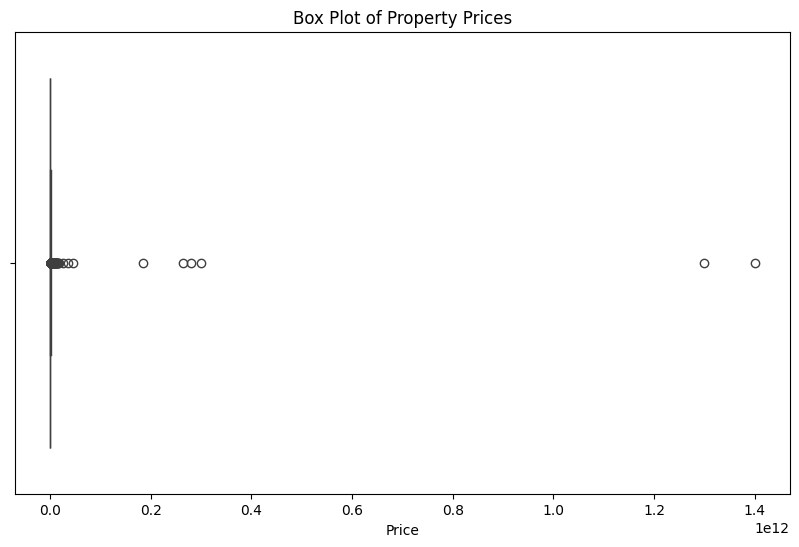

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of property prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Property Prices')
plt.xlabel('Price')
plt.show()


In [45]:
# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Display the outliers
print(outliers)


      added_on_year             type  bedrooms  bathrooms              town  \
1              2025  Detached Duplex         6        6.0   Guzape District   
12             2025  Detached Duplex         7        9.0   Guzape District   
17             2025  Detached Duplex         7        9.0   Guzape District   
22             2025  Terraced Duplex         5        5.0  Asokoro District   
27             2025  Detached Duplex         7        7.0              Wuye   
...             ...              ...       ...        ...               ...   
7174           2023  Detached Duplex         5        6.0           Katampe   
7193           2023  Detached Duplex         9       10.0  Maitama District   
7199           2023  Terraced Duplex         5        6.0  Asokoro District   
7217           2023  Detached Duplex         9       10.0  Maitama District   
7223           2023  Terraced Duplex         5        6.0  Asokoro District   

             price  
1     2.000000e+09  
12    2.3